# Round 4. Error and attack tolerance of networks

Error and attack tolerance of networks are often characterized using percolation analysis, where links are removed from the network according to different rules. Typically this kind of analyses are performed on infrastructure networks, such as power-grids or road networks. In this exercise, we will apply this idea to a Facebook-like web-page (Data originally from http://toreopsahl.com/datasets/), and focus on the role of strong and weak links in the network. In this network, each node corresponds to a user of the website and a link between two nodes represents contact, in form of messages, between the two users. Additionally, an integer "weight" value is assigned to each link that corresponds to the number of messages exchanged between the users. As opposed to a non-weighted network where nodes are either connected or disconnected, here a higher or lower weight on a link shows stronger or weaker relation (as expressed by number of messages) between each two users.

In the file `OClinks_w_undir.edg`, the three entries of each row describe one link: `(node_i node_j w_ij)`, where the last entry `w_ij` is the weight of the link between nodes `node_i` and `node_j`.

Your task is now to remove links (one by one) from the network in the order of

- descending link weight (i.e. remove strong links first),
- ascending link weight (i.e. remove weak links first),
- random order

While removing the links, monitor the *size of the largest component* $S$ as a function of the fraction of removed links $f \in [0,1]$.

**Visualize** $S$ as a function of $f$ in all three cases *in one plot*. There should be clear differences between all three curves. To which of the three approaches is the network most and least vulnerable? In other words, in which case does the giant component shrink fastest / slowest?

To get you started, you may use this notebook, although the use of this notebook is fully **optional**. When using this notebook, you only need to fill in the missing parts of some of the functions, but some of the functions do NOT need any modifications. You may start your solution after the subtitle "**Begining of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random

### Data
Let us load the data from the right folder. If you run this notebook in your machine, please specify the right folder

In [2]:
# Select data directory
import os
if os.path.isdir('../coursedata'):
    course_data_dir = '../coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = './data'
    
print('The data directory is %s' % course_data_dir)

network_path = os.path.join(course_data_dir, 'OClinks_w_undir.edg')
network_name = 'fb-like-network'

The data directory is ./data


# Begining of the exercise
Write your code here to remove links (one by one) from the network.

### a. Visualization

Visualize $S$ as a function of $f$ in all three cases **in one plot**. There should be clear differences between all three curves.

**Hints**
- You need to modify the functions `get_giant_size`, `simulate_edge_removal`, and `run_link_removal`.
- In the exercise, `networkx.connected_components(G)` may turn out handy. It returns a list of the components of the network, each of them presented as a list of nodes belonging to the component.
- Let `components` be the outcome from `networkx.connected_components(G)`. For getting the largest component, you can use `max(componets, key=len)`.
- Edges of the present network are tuples of three values. For sorting them based on their weight, `sorted` unction with `key` parameter can be useful. For more information, check https://wiki.python.org/moin/HowTo/Sorting.
- The overall running time of this simulation can take up to a couple of minutes but not orders of magnitudes more.

In [3]:
pass

In [4]:
pass

In [5]:
!ls

data			     er_breadthfirst_2_10k.pdf
er_breadthfirst_05_100k.pdf  er_percolation.pdf
er_breadthfirst_05_10k.pdf   fb_like_error_and_attack_tolerance.pdf
er_breadthfirst_1_100k.pdf   Round4_error-and-attack-tolerance.ipynb
er_breadthfirst_1_10k.pdf    Round4_percolation-in-er-networks.ipynb
er_breadthfirst_2_100k.pdf


Now plotting: w_big_first
simulate_edge_removal with weight {'weight': 1.0}, max cc size 1 13837/13838          
Now plotting: w_small_first
simulate_edge_removal with weight {'weight': 184.0}, max cc size 1 13837/13838        
Now plotting: random
simulate_edge_removal with weight {'weight': 7.0}, max cc size 1 13837/13838            


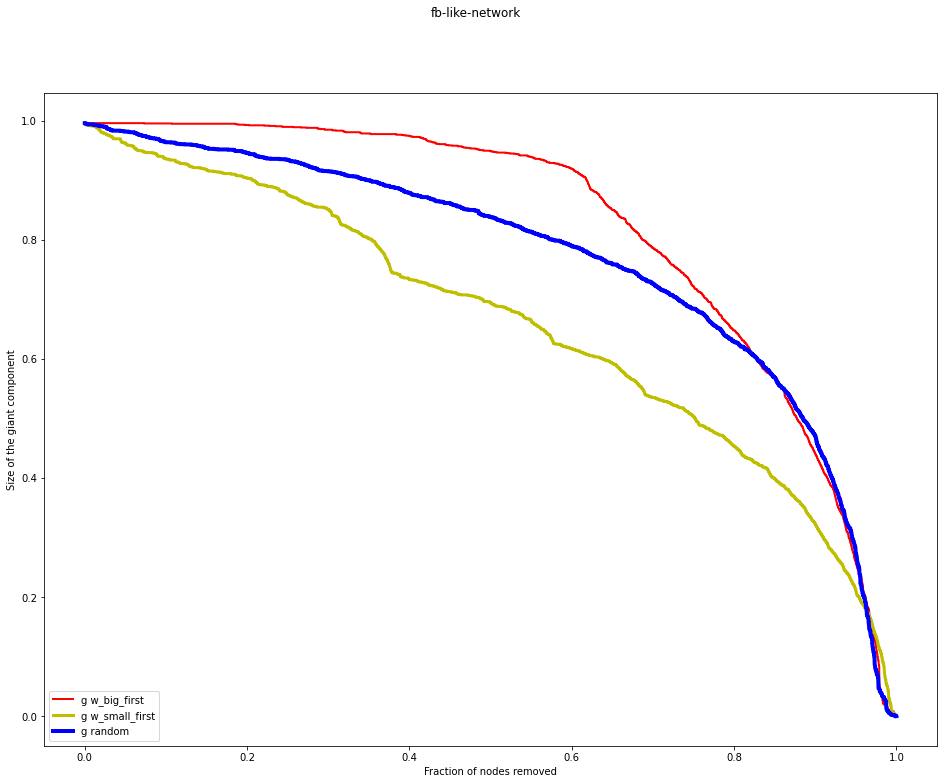

In [6]:
def get_giant_size(net):
    """
    Calculates the size of the largest component (i.e. the giant component) of
    the network.

    Parameters
    ----------
    net: networkx.Graph() object

    Returns
    -------
    giant_size: int
        size of the giant component

    """

    lengths = sorted([len(c) for c in nx.connected_components(net)])
    return max(lenghts)


def simulate_edge_removal(orignet, order):
    """
    Performs an edge removal simulation

    Parameters
    ----------
    orignet: networkx.Graph() object
        Network in which the edge removal is simulated. A copy of orignet is
        created for the simulations, and the original network is not changed.
    order: list of tuples
        network edges sorted in the order in which they will be removed

    Returns
    -------
    giant_sizes: np.array of ints
        sizes of the giant component at different edge densities
    """
    giant_sizes = []
    net = orignet.copy() # Creating a copy of the original network
    n = len(orignet.edges())
    #TODO: Loop over edges and remove them in given order.
    for idx, (u, v, w) in enumerate(order):
        net.remove_edge(u, v)
        CCs = [len(cc) for cc in nx.connected_components(net)]
        giant_sizes.append(max(CCs))
        print(f"simulate_edge_removal with weight {w}, max cc size {max(CCs)} {idx}/{len(order)}       ", end="\r")
    print("simulate_edge_removal")
    return giant_sizes

def run_link_removal(path, net_name):
    """
    Sets up framework and runs the edge removal simulation.

    Parameters
    ----------
    path: string
        path to the network to be analyzed
    net_name: string
        name of the network (for labeling)

    Returns
    -------
    No direct output, saves figure of the giant component size as a function
    of network density.
    """
    # setting up:
    net = nx.read_edgelist(path, data=(("weight", float),)) # Read the network from path
    N = net.number_of_nodes() # Replace with the number of nodes
    edges = net.edges(data=True) # Replace with the network edges

    fig = plt.figure(figsize=(16, 16 * 3 / 4.))
    ax = fig.add_subplot(111)
    fig.suptitle(net_name)

    # defining orders in which to remove the edges
    # Replace with edges sorted by decreasing weight, see exercise sheet for hints
    descending_weight_edge_order = sorted(edges, key=lambda x: x[2]["weight"], reverse=True)
    # Replace with edges sorted by increasing weight, see exercise sheet for hints
    ascending_weight_edge_order = sorted(edges, key=lambda x: x[2]["weight"])
    # Replace with edges sorted in random order
    random_edge_order = random.sample(list(edges), len(edges))
    
    # edge removal:
    for order, order_name, color, ls, lw in zip(
        [descending_weight_edge_order, ascending_weight_edge_order, random_edge_order],
        ["w_big_first", "w_small_first", 'random'],
        ["r", "y", "b"],
        ["-", "-", "-"],
        [2, 3, 4]):

        print("Now plotting:", order_name)

        giant_sizes = simulate_edge_removal(net, order)
        fracs = np.linspace(0, 1, len(giant_sizes))

        ax.plot(fracs, np.array(giant_sizes) / float(N), color=color, ls=ls,
                label="g " + order_name, lw=lw)

        ax.set_ylabel('Size of the giant component') # Set label
        ax.set_xlabel('Fraction of nodes removed') # Set label

        ax.legend(loc='lower left')
    return fig

# Let's visualize the link removal
fig = run_link_removal(network_path, network_name)
fig.savefig("./fb_like_error_and_attack_tolerance.pdf")